<a href="https://colab.research.google.com/github/HoangQuanHCMUTEK19/CNN/blob/main/Nhandientienviet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten,Conv2D,MaxPooling2D
from keras.datasets import mnist, fashion_mnist, cifar10, cifar100
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
from keras.utils import np_utils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v2 as tf
from tensorflow import keras
import os
import pickle
import pandas as pd
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.preprocessing import  image

In [79]:
#Link Train va test
train_path = '/content/drive/MyDrive/TienViet/'

In [80]:
#Ket noi voi google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [82]:
path_img = []
labels = ['200','500','1000','2000','5000','10000','20000','50000','100000','200000','500000']
x_train = []
y_train = []
# Tao dataset
for i in labels:
  path = os.path.join(train_path,i)
  index_label = labels.index(i)
  for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(200,300)) 
      img = img_to_array(img)
      img = img.reshape(200,300,3) 
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)

# xử lí dữ liệu
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train)

In [83]:
#Thiết lập model 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 300, 3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 200, 300, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 100, 150, 32)     0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 480000)            0         
                                                                 
 dense_22 (Dense)            (None, 256)               122880256 
                                                                 
 dense_23 (Dense)            (None, 11)                2827      
                                                                 
Total params: 122,883,979
Trainable params: 122,883,979
Non-trainable params: 0
_______________________________________

In [84]:
#Complie Model 
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])

In [85]:
#Training Model 
history = model.fit(x_train,y_train,epochs = 20)

Epoch 1/20
3/3 [==============================] - 10s 2s/step - loss: 2.5638 - accuracy: 0.1389
Epoch 2/20
3/3 [==============================] - 5s 1s/step - loss: 10.3937 - accuracy: 0.1528
Epoch 3/20
3/3 [==============================] - 5s 1s/step - loss: 3.0923 - accuracy: 0.1667
Epoch 4/20
3/3 [==============================] - 5s 2s/step - loss: 0.4511 - accuracy: 0.1111
Epoch 5/20
3/3 [==============================] - 5s 1s/step - loss: 0.3592 - accuracy: 0.0833
Epoch 6/20
3/3 [==============================] - 5s 1s/step - loss: 0.3828 - accuracy: 0.0833
Epoch 7/20
3/3 [==============================] - 5s 2s/step - loss: 0.3134 - accuracy: 0.1944
Epoch 8/20
3/3 [==============================] - 5s 1s/step - loss: 0.3201 - accuracy: 0.1389
Epoch 9/20
3/3 [==============================] - 4s 1s/step - loss: 0.2955 - accuracy: 0.2500
Epoch 10/20
3/3 [==============================] - 5s 1s/step - loss: 0.2955 - accuracy: 0.3889
Epoch 11/20
3/3 [==============================

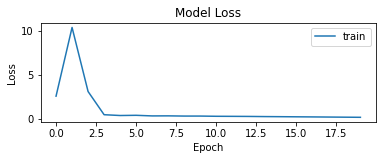

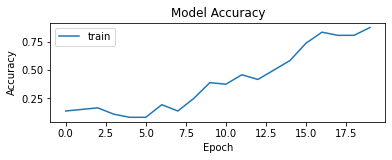

In [86]:
#Vẽ đồ thị loss 
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()
#Vẽ đồ thị Accuracy
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()

Đây là tờ 500000


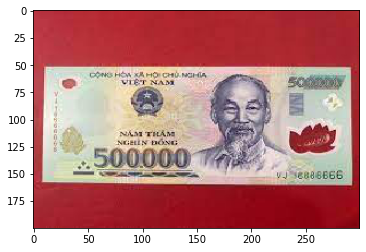

In [88]:
#Load ảnh 
img = image.load_img('500k1.jpg',target_size=(200,300))
plt.imshow(img)
#Chuyển ảnh về mảng 
img = img_to_array(img)
img = img.reshape(1,200,300,3) #thay đổi hình dạng mảng 
img = img.astype('float32') #thay đổi kiểu dữ liệuliệu
img = img/255 #chuẩn hóa dữ liệu thành 0 và  1 
print('Đây là tờ '+ labels[np.argmax(model.predict(img))]) #dự đoán 



Đây là tờ 200000


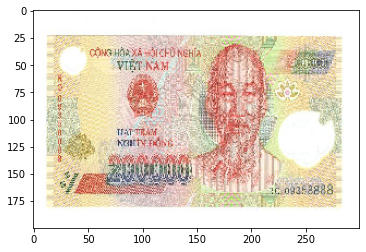

In [91]:
#Load ảnh 
img1 = image.load_img('8888-200K.jpg',target_size=(200,300))
plt.imshow(img1)
#Chuyển ảnh về mảng 
img1 = img_to_array(img1)
img1 = img1.reshape(1,200,300,3) #thay đổi hình dạng mảng 
img1 = img1.astype('float32') #thay đổi kiểu dữ liệuliệu
img1 = img1/255 #chuẩn hóa dữ liệu thành 0 và  1 
print('Đây là tờ '+ labels[np.argmax(model.predict(img1))]) #dự đoán 
